# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
from citipy import citipy
#from config import openweatherkey
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key
#api_key = "02485a48a01e1133ea9b6e3d2adc8bbd"
api_key="c400bb631a29a3b65bf60a13b9f3d64c"

# Starting URL for Weather Map API Call

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=&APPID=" + api_key
url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="


In [5]:
# Create empty lists to append the API data into the lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []



# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    #urlCity=url+ "&q ="+ city
    urlCity=url + city
    
    try: 
        response = requests.get(urlCity).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop for not over exceed rate limitation of API
        time.sleep(1.03)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Namibe
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=namibe
Processing Record 2 | Bud
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=bud
Processing Record 3 | Neijiang
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=neijiang
Processing Record 4 | Rikitea
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=rikitea
City not found. Skipping...
Processing Record 5 | Liverpool
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=liverpool
Processing Record 6 | Santa Marta
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=santa marta
Processing Record 7 | Grindavik
https://a

Processing Record 55 | Cururupu
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=cururupu
City not found. Skipping...
Processing Record 56 | Kingaroy
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kingaroy
Processing Record 57 | San Isidro
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=san isidro
Processing Record 58 | Arraial do Cabo
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=arraial do cabo
Processing Record 59 | Skjervoy
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=skjervoy
Processing Record 60 | Saldanha
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=saldanha
Processing Record 61 | Katherine
https://api.openweathermap.org/da

Processing Record 109 | Ambilobe
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=ambilobe
Processing Record 110 | Quesnel
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=quesnel
City not found. Skipping...
Processing Record 111 | Half Moon Bay
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=half moon bay
Processing Record 112 | Kurchum
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kurchum
Processing Record 113 | Sumenep
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=sumenep
Processing Record 114 | Rock Sound
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=rock sound
Processing Record 115 | Valdivia
https://api.openweathermap.org/data/2

Processing Record 163 | Tanout
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=tanout
Processing Record 164 | Sedan
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=sedan
Processing Record 165 | Sabha
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=sabha
Processing Record 166 | Port Pirie
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=port pirie
Processing Record 167 | Helena
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=helena
Processing Record 168 | Khatanga
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=khatanga
Processing Record 169 | Biloela
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&uni

Processing Record 218 | Ust-Kuyga
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=ust-kuyga
Processing Record 219 | Vuktyl
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=vuktyl
Processing Record 220 | Talnakh
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=talnakh
Processing Record 221 | Taitung
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=taitung
Processing Record 222 | Tessalit
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=tessalit
Processing Record 223 | Launceston
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=launceston
Processing Record 224 | Finschhafen
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65b

Processing Record 273 | Muros
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=muros
Processing Record 274 | Kjollefjord
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kjollefjord
Processing Record 275 | Emba
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=emba
Processing Record 276 | Biak
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=biak
Processing Record 277 | Mount Gambier
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=mount gambier
Processing Record 278 | Jinchang
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=jinchang
Processing Record 279 | Castrovillari
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf6

Processing Record 327 | Juruti
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=juruti
Processing Record 328 | Nome
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=nome
Processing Record 329 | Narrabri
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=narrabri
Processing Record 330 | San Cristobal
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=san cristobal
Processing Record 331 | Tommot
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=tommot
Processing Record 332 | Dubbo
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=dubbo
Processing Record 333 | Wewak
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&u

Processing Record 382 | Timizart
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=timizart
Processing Record 383 | Goundam
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=goundam
Processing Record 384 | Gambela
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=gambela
Processing Record 385 | Kaduna
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kaduna
Processing Record 386 | Kokkola
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=kokkola
Processing Record 387 | Urucara
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=urucara
Processing Record 388 | Vila Velha
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d

Processing Record 437 | Payakumbuh
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=payakumbuh
Processing Record 438 | Padang
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=padang
Processing Record 439 | Lapas
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=lapas
Processing Record 440 | Alta Floresta
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=alta floresta
Processing Record 441 | Shorapur
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=shorapur
Processing Record 442 | Altay
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=altay
Processing Record 443 | Perth
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13

City not found. Skipping...
Processing Record 491 | Mozarlandia
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=mozarlandia
Processing Record 492 | Lev Tolstoy
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=lev tolstoy
Processing Record 493 | Mujiayingzi
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=mujiayingzi
Processing Record 494 | Pilar
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=pilar
City not found. Skipping...
Processing Record 495 | Stonewall
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=stonewall
Processing Record 496 | Gazanjyk
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=gazanjyk
Processing Record 497 | Portland
htt

Processing Record 545 | Saint-Francois
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=saint-francois
Processing Record 546 | Nara
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=nara
Processing Record 547 | Horki
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=horki
Processing Record 548 | Atar
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=atar
City not found. Skipping...
Processing Record 549 | Novyy Urgal
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=novyy urgal
Processing Record 550 | Irara
https://api.openweathermap.org/data/2.5/weather?appid=c400bb631a29a3b65bf60a13b9f3d64c&units=imperial&q=&q=irara
Processing Record 551 | Trelew
https://api.openweathermap.org/data/2.5/weather?appid=c40

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count

weather_data.head()

# Save data frame to CSV
weather_data.to_csv('output_data/weather_data.csv')

In [6]:
# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nanortalik,88,GL,1553476127,94,60.14,-45.24,31.26,39.73
1,Padang,20,ID,1553472000,88,-0.92,100.36,77.00,1.12
2,Tessalit,88,ML,1553476130,20,20.20,1.01,72.30,4.61
3,Kununurra,0,AU,1553473800,52,-15.77,128.74,91.40,10.29
4,Tiksi,44,RU,1553476119,61,71.64,128.87,-7.72,3.94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

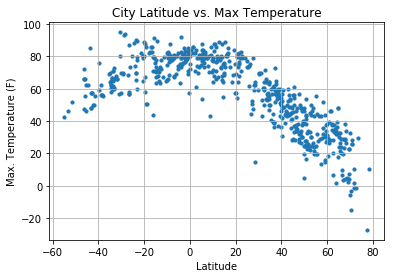

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()





#### Latitude vs. Humidity Plot

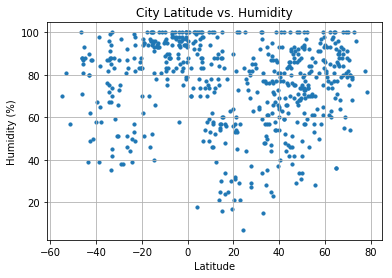

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

#### Latitude vs. Cloudiness Plot

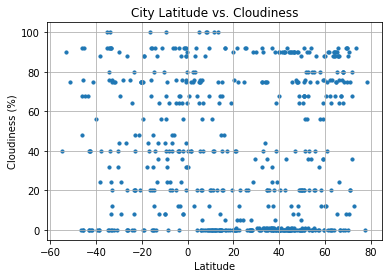

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

#### Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Wind Speed_vs_Latitude.png")